<a href="https://colab.research.google.com/github/ArezooNajafi/Arezoo_Najafi-Portfolio/blob/master/Laptop_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install requests
from requests import get

async def download(url, filename):
    response = get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)


In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [ ]:
await download(file_path, "laptops.csv")
file_name="laptops.csv"

In [ ]:
df = pd.read_csv(file_name, header=0)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [ ]:
df = df.drop(columns=['Unnamed: 0'])


In [ ]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [ ]:
df['Screen_Size_cm']=np.round(df['Screen_Size_cm'],2)
df['Screen_Size_cm']

,Screen_Size_cm
0,35.56
1,39.62
2,39.62
3,33.78
4,39.62
...,...
233,35.56
234,33.78
235,30.48
236,39.62


In [ ]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



In [ ]:
print(missing_data.columns)

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')


In [ ]:
mean= df['Weight_kg'].astype('float').mean()
mean

1.8622317596566522

In [ ]:
df['Screen_Size_cm'].value_counts()


,count
Screen_Size_cm,
39.62,89
35.56,64
38.10,23
33.78,20
33.02,18
43.94,7
43.18,5
31.75,4
30.48,4


In [ ]:
df['CPU_frequency']=df['CPU_frequency']/df['CPU_frequency'].max()
df['CPU_frequency']

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


In [ ]:
bins=np.linspace(df['Price'].min(),df['Price'].max(),4)
gp_bins=["Low","Medium","High"]
df['Price-binned'] = pd.cut(df['Price'], bins, labels=gp_bins, include_lowest=True )

Text(0.5, 1.0, 'Price bins')

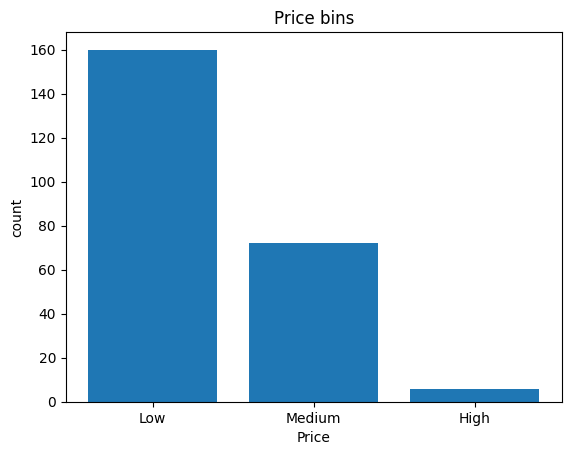

In [ ]:
plt.bar(gp_bins, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [ ]:
pd.get_dummies(df["Screen"]).rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)

df


,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price-binned
0,Acer,4,IPS Panel,2,1,5,35.56,0.551724,8,256,1.60,978,Low
1,Dell,3,Full HD,1,1,3,39.62,0.689655,4,256,2.20,634,Low
2,Dell,3,Full HD,1,1,7,39.62,0.931034,8,256,2.20,946,Low
3,Dell,4,IPS Panel,2,1,5,33.78,0.551724,8,128,1.22,1244,Low
4,HP,4,Full HD,2,1,7,39.62,0.620690,8,256,1.91,837,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.56,0.896552,8,256,1.70,1891,Medium
234,Toshiba,3,Full HD,2,1,5,33.78,0.827586,8,256,1.20,1950,Medium
235,Lenovo,4,IPS Panel,2,1,5,30.48,0.896552,8,256,1.36,2236,Medium
236,Lenovo,3,Full HD,3,1,5,39.62,0.862069,6,256,2.40,883,Low
